## Bildverarbeitung mit Numpy und Matplotlib

Bilder sind Matrizen von Pixeln. Mit Numpy können wir Matrizen erzeugen und manipulieren. Mit Matplotlib können wir Bilder anzeigen, das Dateien laden und speichern. 

> In der Praxis würde man zur Bildverarbeitung weitere Module nutzen wie z.B. OpenCV, Pillow, scikit-image u.a.

Obacht bei Pixel-Indizierung mit Numpy-Arrays als Datenstruktur für Bilder: 
+ Denkweise entspricht Arbeiten mit Tabellen 
+ z.B. [10, 30]: Pixel in 'Zeile 10', 'Spalte 30'
   + _also nicht_: ~~x=10, y=30~~, sondern y=10, x=30

Bei Farbbildern haben Pixel jeweils 3 Kanäle (RGB - indiziert mit 0,1,2)
+ z.B. [10, 30, 0]: Rotwert von Pixel in Zeile 10, Spalte 30

Verschiedene Konventionen für Wertebereich/Datentyp der Pixelwerte, z.B.
+ 0 .. 255, Datentyp `uint8`
+ 0.0 .. 1.0, Datentyp `float`

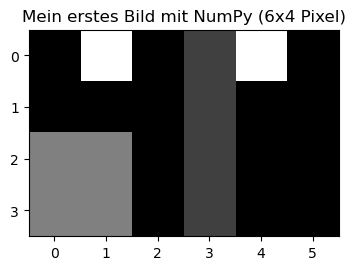

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,3)  # Bildgröße in Zoll


# Grauwertbild erstellen (pro Pixel ein Wert von 0-255; 0 = schwarz)
my_first_image = np.zeros((4, 6), dtype='uint8')  # Höhe 4, Breite 6! Schwarz.
my_first_image[0, 1] = 200  # Hellgrauer Pixel oben links
my_first_image[0, 4] = 200  # Hellgrauer Pixel oben rechts
my_first_image[2:4, 0:2] = 100  # Mittelgraues Quadrat unten links
my_first_image[:, 3] = 50  # Dunkelgrauer vertikaler Streifen 
plt.imshow(my_first_image, cmap='gray')
plt.title("Mein erstes Bild mit NumPy (6x4 Pixel)")
# plt.axis('off')
plt.show()

### Farbbilder

Additive Farbmischung von RGB-Pixeln, z.B.
  - grün (0, 255, 0) + blau (0, 0, 255) = cyan (0, 255, 255)
  - rot (255, 0, 0) + blau (0, 0, 255) = magenta (255, 0, 255)
  - rot (255, 0, 0) + grün (0, 255, 0) = gelb (255, 255, 0)
  - rot + grün + blau = weiß (255, 255, 255)

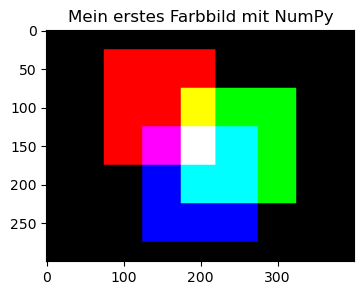

In [2]:
# Höhe 300, Breite 400, 3 Kanäle (RGB), Hintergrund schwarz (0, 0, 0)
my_first_color_image = np.zeros((300, 400, 3), dtype='uint8')  
# Rotes Rechteck
my_first_color_image[25:175, 75:220, 0] = 255  # Roter Kanal
# Grünes Rechteck
my_first_color_image[75:225, 175:325, 1] = 255  # Grüner Kanal
# Blaues Rechteck
my_first_color_image[125:275, 125:275, 2] = 255  # Blauer Kanal
plt.imshow(my_first_color_image)
plt.title("Mein erstes Farbbild mit NumPy")
# plt.axis('off')
plt.show()

## Bilddatei laden

Image shape: (832, 1281, 3)
Image data type: uint8


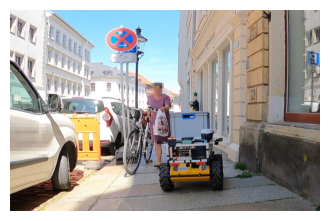

In [3]:
# load an image using matplotlib and convert it to a numpy array
import matplotlib.pyplot as plt
imgfile = 'Engstelle_Roboter_smaller.jpg'  # replace with your image file   
image = plt.imread(imgfile) 
image_array = np.array(image)
print("Image shape:", image_array.shape)
print("Image data type:", image_array.dtype)

# show the image
plt.imshow(image_array)
plt.axis('off')  # hide axis
plt.show()

## Bildverarbeitung

Ändern der RGB-Werte der Pixel eines Bildes. 

> Beispiel: Funktion zur Reduktion der Helligkeit in einem Bild. Indem wir nur die Grün- und Blau-Werte reduzieren, erscheint das Bild rötlicher, etwa wie bei einem Sonnenuntergang. 

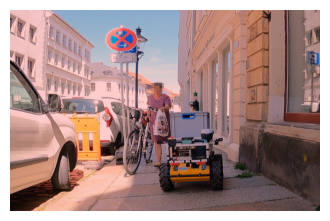

In [4]:
def make_sunset(img):
    "modifies the image in place to give it a sunset effect"
    for i in range(img.shape[0]):  # iterate over height
        for j in range(img.shape[1]):  # iterate over width
            r, g, b = img[i, j]
            # Decrease green and blue channel
            g = int(g * 0.8)
            b = int(b * 0.8)
            img[i, j] = [r, g, b]

# apply the function
sunset_image = image_array.copy()
make_sunset(sunset_image)

# show the sunset image
plt.imshow(sunset_image)
plt.axis('off')  # hide axis
plt.show()

> Beispiel: Stark rote Pixel erkennen, z.B. Halteverbotsschild

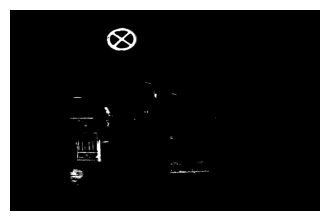

In [5]:
def is_reddish_pixel(pixel) -> bool:
    "returns True if the pixel is reddish"
    r, g, b = pixel
    # define thresholds for reddish color. Can be adjusted.
    is_reddish = r > 200 and g < 200 and b < 200 \
                 and r > g + 50 and r > b + 50
    return is_reddish

def detect_reddish_pixels(img):
    "returns a boolean mask where reddish pixels are True"
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=bool)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if is_reddish_pixel(img[i, j]):
                mask[i, j] = True
    return mask

# apply the function
red_mask = detect_reddish_pixels(image_array)

# show the red mask
plt.imshow(red_mask, cmap='gray')
plt.axis('off')  # hide axis
plt.show()